# Machine Learning Classification Model

In [ ]:
???

,change_tomorrow_direction,prediction
Date,,
2016-12-08,UP,UP
2016-12-09,UP,UP
...,...,...
2023-03-14,UP,DOWN
2023-03-15,UP,UP


## Load the data

In [1]:
import pandas as pd

df = pd.read_excel('data/Microsoft_LinkedIn_Processed.xlsx', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800,1.549143,UP
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400,0.321692,UP
2016-12-12,56.803028,57.244073,56.711145,57.124622,20198100,1.286112,UP
2016-12-13,57.427836,58.273172,57.188938,57.868881,35718900,-0.478622,DOWN
2016-12-14,57.887258,58.300739,57.455399,57.593227,30352700,-0.159789,DOWN
...,...,...,...,...,...,...,...
2023-03-09,255.820007,259.559998,251.580002,252.320007,26653400,-1.500467,DOWN
2023-03-10,251.080002,252.789993,247.600006,248.589996,28321800,2.099087,UP
2023-03-13,247.399994,257.910004,245.729996,253.919998,33339700,2.634307,UP


## Machine Learning Model

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [2]:
target = df.change_tomorrow_direction
explanatory = df[['Open','High','Low','Close','Volume']]

### Compute the model

The following Python code will compute the numbers of the mathematical equation that we will use to calculate if the ticker goes UP or DOWN.

In [3]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=15)
model_dt.fit(explanatory, target)

DecisionTreeClassifier(max_depth=15)

### Visualize the model

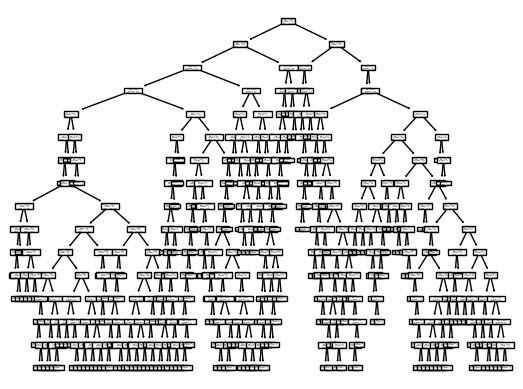

In [4]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_);

### Calculate the predictions

In [5]:
explanatory

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400
2016-12-12,56.803028,57.244073,56.711145,57.124622,20198100
2016-12-13,57.427836,58.273172,57.188938,57.868881,35718900
2016-12-14,57.887258,58.300739,57.455399,57.593227,30352700
...,...,...,...,...,...
2023-03-09,255.820007,259.559998,251.580002,252.320007,26653400
2023-03-10,251.080002,252.789993,247.600006,248.589996,28321800
2023-03-13,247.399994,257.910004,245.729996,253.919998,33339700


In [6]:
y_pred = model_dt.predict(X=explanatory)
y_pred

array(['UP', 'UP', 'UP', ..., 'UP', 'DOWN', 'UP'], dtype=object)

In [10]:
df_predictions = df[['change_tomorrow_direction']].copy()
df_predictions['prediction'] = y_pred
df_predictions

,change_tomorrow_direction,prediction
Date,,
2016-12-08,UP,UP
2016-12-09,UP,UP
2016-12-12,UP,UP
2016-12-13,DOWN,DOWN
2016-12-14,DOWN,DOWN
...,...,...
2023-03-09,DOWN,UP
2023-03-10,UP,UP
2023-03-13,UP,UP


### Evaluate the model: compare predictions with the reality

In [11]:
comp = df_predictions.change_tomorrow_direction == df_predictions.prediction

In [12]:
comp.sum()

1309

In [13]:
len(comp)

1576

In [14]:
comp.sum()/len(comp)

0.8305837563451777

## Save the model into a file

- We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [15]:
import pickle

In [16]:
with open('models/model_dt_classification.pkl', 'wb') as f:
    pickle.dump(model_dt, f)